In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter\\Datacamp'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv('ch1_discoveries.csv')

# Display the first five lines of the DataFrame
print(discoveries.head(5))

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


In [4]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


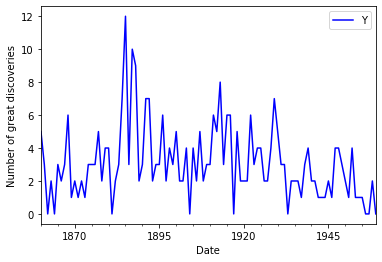

In [5]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

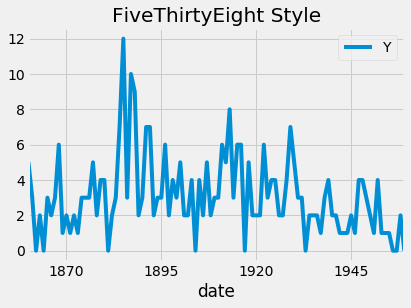

In [6]:

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

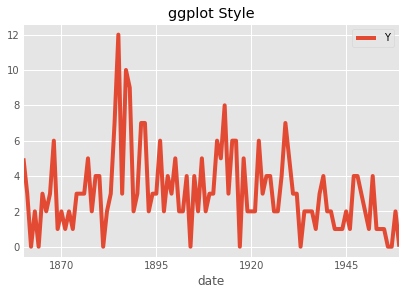

In [7]:
# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
plt.title('ggplot Style')
plt.show()

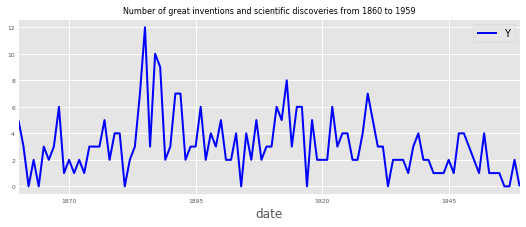

In [8]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

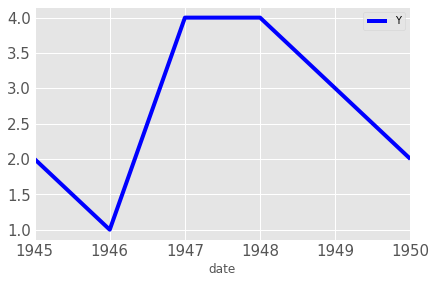

In [9]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

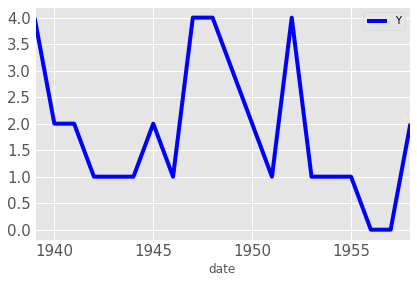

In [10]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939':'1958']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

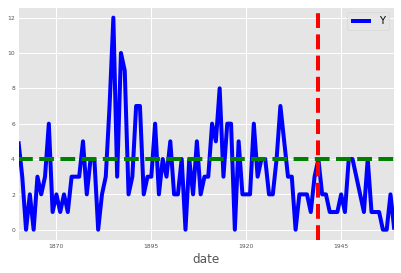

In [11]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

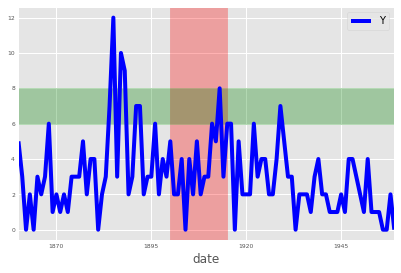

In [12]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

# excercise 2

In [13]:
co2_levels = pd.read_csv('ch2_co2_levels.csv')

In [14]:
co2_levels.head(7)

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
5,1958-05-03,316.9
6,1958-05-10,NaN


In [15]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')


# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [16]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')


# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


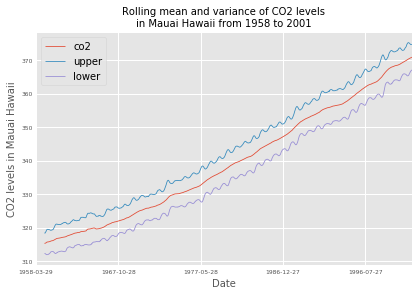

In [17]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()


# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] +  (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [18]:
co2_levels.reset_index('datestamp',inplace=True)

In [19]:
co2_levels['datestamp'] = pd.to_datetime(co2_levels.datestamp)

In [20]:
co2_levels.set_index('datestamp',inplace=True)

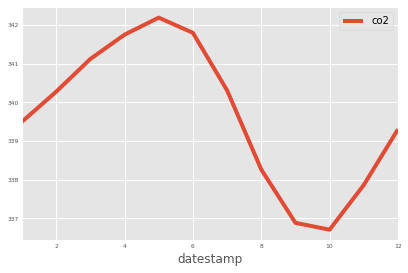

In [21]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month =  co2_levels.groupby(index_month).mean()


# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

In [22]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


No handles with labels found to put in legend.


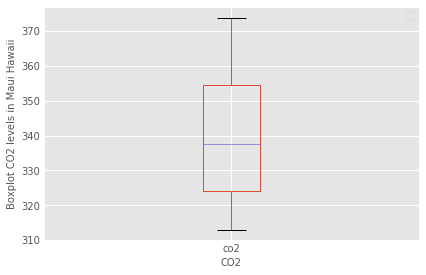

In [23]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

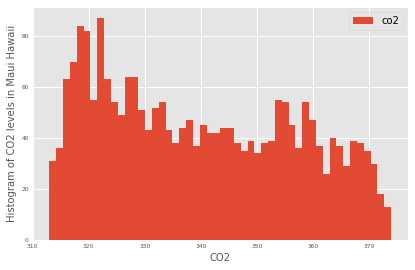

In [24]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

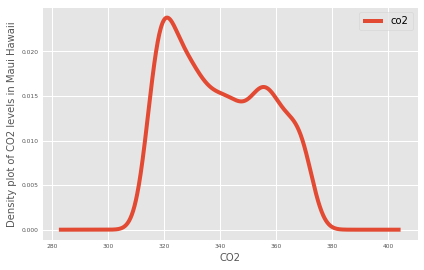

In [25]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()